BASE MODELS
    Linear Regression
    Random Forest Regression
    Decision Tree Regressor

Normalised Values
[[ 1.01191893  0.20838884 -0.67278648 ...  0.09270809  0.25313442
   0.05250636]
 [-0.45444531 -0.53541333 -0.21465038 ... -0.50564341 -0.84026176
  -0.32354156]
 [-0.34164806 -1.17295804 -0.67278648 ... -1.08341963 -0.93221918
   0.47033738]
 ...
 [ 0.10954093 -0.11038352  0.47255378 ...  0.14303412  0.30443993
  -2.87732475]
 [-0.68003981 -0.42915587  0.47255378 ... -0.03074361  0.12921619
  -2.84139128]
 [-1.24402606 -1.06670058 -1.13092259 ... -1.09287313 -1.1363198
  -2.84139128]]
Linear Regression Model Metrics:
R^2 Score: 0.5894891031635892
Mean Squared Error: 3354.965696456435
Root Mean Squared Error: 57.922065712959814
Mean Absolute Error: 38.98264490926722

Cross-Validation Results (Model):
Mean CV Score (MSE): 35.99031819041117
Standard Deviation of CV Scores: 70.14881630808146
Random Forest Model Metrics:
R^2 Score: 0.955711838524161
Mean Squared Error: 361.9520545145837
Root Mean Squared Error: 19.025037569334355
Mean Absolute Error: 6.2982385132541925

C

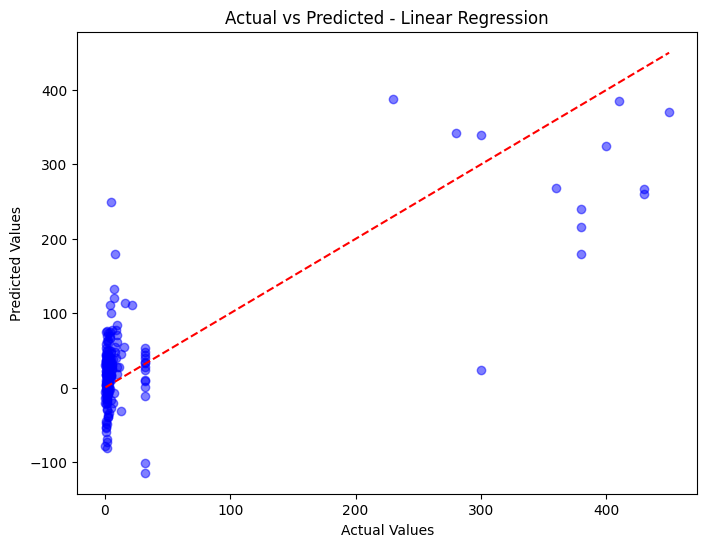

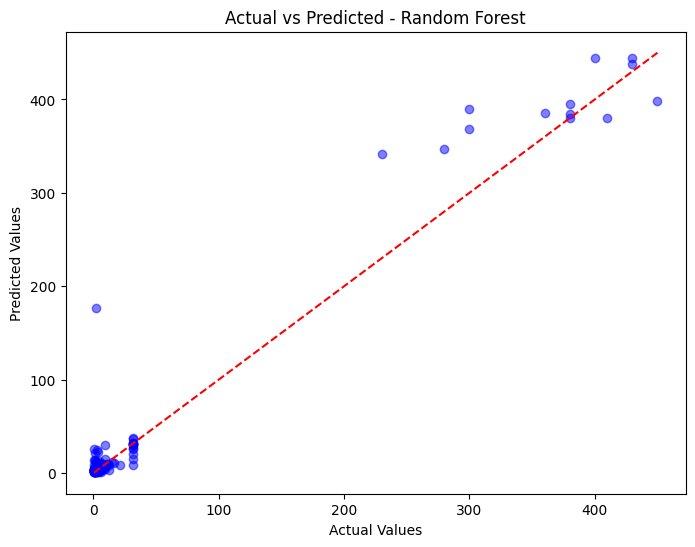

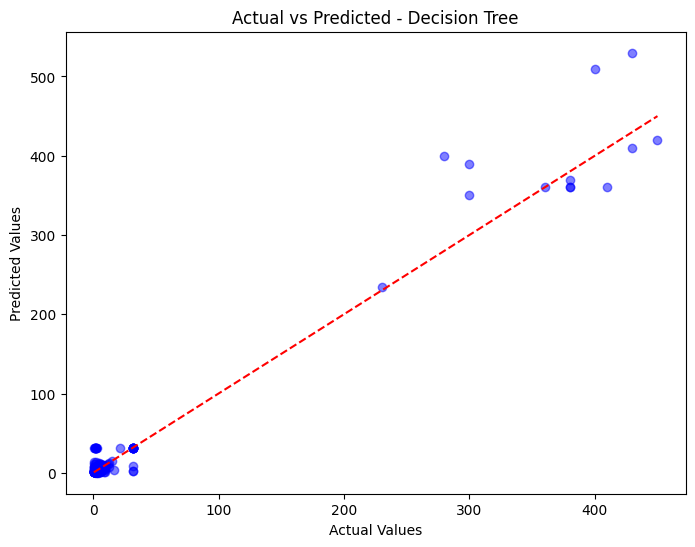

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('blast_data_M.csv')

# Preprocessing steps
df.replace({'NIL': np.nan, 'nil': np.nan}, inplace=True)
numeric_columns = ['Depth (m)', 'Stemming(m)', 'Decking(m)', 'Total Drill (RMT)', 
                   'MCPD (kg/D)', 'Explosive(kg)', 'Seis. Dist. (m)', 'PPV MON']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
imputer_num = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer_num.fit_transform(df[numeric_columns])
df['Time(hours)'] = pd.to_datetime(df['Time(hours)'], format='%I.%M%p', errors='coerce')

# Define features and target
X = df.drop(columns=['PPV MON', 'Time(hours)'])
y = np.log1p(df['PPV MON'])  # Log transformation of the target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Normalised Values")
print(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Base models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

# Evaluate a given model
def print_metrics(model_name, y_true, predictions):
    # Inverse the log transformation for evaluation
    y_true_exp = np.expm1(y_true)
    predictions_exp = predictions
    
    mse = mean_squared_error(y_true_exp, predictions_exp)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_exp, predictions_exp)
    mae = mean_absolute_error(y_true_exp, predictions_exp)
    
    print(f"{model_name} Metrics:")
    print("R^2 Score:", r2)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Mean Absolute Error:", mae)
    return r2

# Cross-validation function
def cross_val_metrics(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print("\nCross-Validation Results (Model):")
    print("Mean CV Score (MSE):", np.mean(-cv_scores))  # Negative because cross_val_score uses negative MSE
    print("Standard Deviation of CV Scores:", np.std(cv_scores))

# 1. Evaluate Linear Regression
lr_model.fit(X_train, np.expm1(y_train))
lr_predictions = lr_model.predict(X_test)
print_metrics("Linear Regression Model", y_test, lr_predictions)
cross_val_metrics(lr_model, X_scaled, y)

# 2. Evaluate Random Forest
rf_model.fit(X_train, np.expm1(y_train))
rf_predictions = rf_model.predict(X_test)
print_metrics("Random Forest Model", y_test, rf_predictions)
cross_val_metrics(rf_model, X_scaled, y)

# 3. Evaluate Decision Tree
dt_model.fit(X_train, np.expm1(y_train))
dt_predictions = dt_model.predict(X_test)
print_metrics("Decision Tree Model", y_test, dt_predictions)
cross_val_metrics(dt_model, X_scaled, y)


def plot_actual_vs_predicted(y_true, predictions, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, predictions, alpha=0.5, color='blue')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.show()

# Plot for each model
plot_actual_vs_predicted(np.expm1(y_test), lr_predictions, "Linear Regression")
plot_actual_vs_predicted(np.expm1(y_test), rf_predictions, "Random Forest")
plot_actual_vs_predicted(np.expm1(y_test), dt_predictions, "Decision Tree")



Hybrid Model: XGBoost + Random Forest + Gradient Boosting + ElasticNet

Normalised Values:
[[ 1.01191893  0.20838884 -0.67278648 ...  0.09270809  0.25313442
   0.05250636]
 [-0.45444531 -0.53541333 -0.21465038 ... -0.50564341 -0.84026176
  -0.32354156]
 [-0.34164806 -1.17295804 -0.67278648 ... -1.08341963 -0.93221918
   0.47033738]
 ...
 [ 0.10954093 -0.11038352  0.47255378 ...  0.14303412  0.30443993
  -2.87732475]
 [-0.68003981 -0.42915587  0.47255378 ... -0.03074361  0.12921619
  -2.84139128]
 [-1.24402606 -1.06670058 -1.13092259 ... -1.09287313 -1.1363198
  -2.84139128]]
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Stacking Model (XGBoost + Random Forest + Gradient Boosting + ElasticNet) Metrics:
R^2 Score: 0.974766627277997
Mean Squared Error: 206.22375810393027
Root Mean Squared Error: 14.360492961731163
Mean Absolute Error: 5.8721521702568

Cross-Validation Results (Stacking Model):
Mean CV Score (MSE): 1.5698

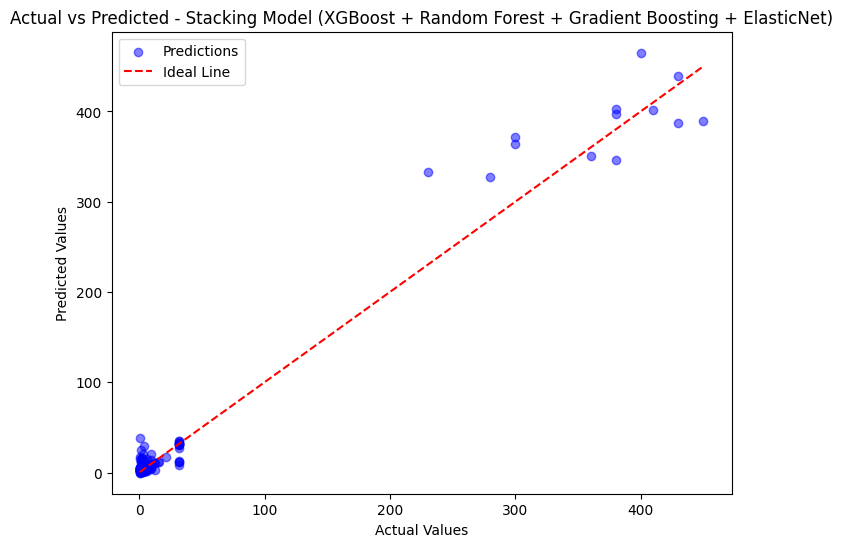

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('blast_data_M.csv')

# Preprocessing steps
df.replace({'NIL': np.nan, 'nil': np.nan}, inplace=True)
numeric_columns = ['Depth (m)', 'Stemming(m)', 'Decking(m)', 'Total Drill (RMT)', 
                   'MCPD (kg/D)', 'Explosive(kg)', 'Seis. Dist. (m)', 'PPV MON']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
imputer_num = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer_num.fit_transform(df[numeric_columns])
df['Time(hours)'] = pd.to_datetime(df['Time(hours)'], format='%I.%M%p', errors='coerce')

# Define features and target
X = df.drop(columns=['PPV MON', 'Time(hours)'])
y = np.log1p(df['PPV MON'])  # Log transformation of the target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Normalised Values:")
print(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define base models
xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth=6, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Hyperparameter tuning for XGBoost using GridSearchCV
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 6, 7],
    'subsample': [0.8, 1.0],  # Add subsampling for regularization
    'colsample_bytree': [0.8, 1.0]  # Add column subsampling for regularization
}

grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, cv=3, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, np.expm1(y_train))
best_xgb_model = grid_search_xgb.best_estimator_

# Hyperparameter tuning for RandomForest using GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 6, 7, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]  # More hyperparameters to tune
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=3, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, np.expm1(y_train))
best_rf_model = grid_search_rf.best_estimator_

# Hyperparameter tuning for GradientBoosting using GridSearchCV
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=3, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, np.expm1(y_train))
best_gb_model = grid_search_gb.best_estimator_

# Create a stacking model with ElasticNet as the meta-model
stacking_model = StackingRegressor(
    estimators=[('xgb', best_xgb_model), ('rf', best_rf_model), ('gb', best_gb_model)],
    final_estimator=ElasticNet(alpha=0.1, l1_ratio=0.7)  # ElasticNet as meta-model
)

# Train the stacking model
stacking_model.fit(X_train, np.expm1(y_train))  # Reverse log transformation for training

# Make predictions
stacking_predictions = stacking_model.predict(X_test)

# Evaluate the model
def print_metrics(model_name, y_true, predictions):
    # Inverse the log transformation for evaluation
    y_true_exp = np.expm1(y_true)
    predictions_exp = predictions
    
    mse = mean_squared_error(y_true_exp, predictions_exp)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_exp, predictions_exp)
    mae = mean_absolute_error(y_true_exp, predictions_exp)
    
    print(f"{model_name} Metrics:")
    print("R^2 Score:", r2)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Mean Absolute Error:", mae)
    return r2

# Print model performance
print_metrics("Stacking Model (XGBoost + Random Forest + Gradient Boosting + ElasticNet)", y_test, stacking_predictions)

# Cross-validation for Stacking Model
cv_scores = cross_val_score(stacking_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print("\nCross-Validation Results (Stacking Model):")
print("Mean CV Score (MSE):", np.mean(-cv_scores))  # Negative because cross_val_score uses negative MSE
print("Standard Deviation of CV Scores:", np.std(cv_scores))


# Function to plot Actual vs Predicted
def plot_actual_vs_predicted(y_true, predictions, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, predictions, alpha=0.5, color='blue', label='Predictions')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal Line')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.legend()
    plt.show()

# Plot for Stacking Model
plot_actual_vs_predicted(np.expm1(y_test), stacking_predictions, "Stacking Model (XGBoost + Random Forest + Gradient Boosting + ElasticNet)")



In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

# Load the dataset
df = pd.read_csv('blast_data_M.csv')
df.isnull().sum()
df.select_dtypes(include=['object', 'category']).columns

Index(['Time(hours)', 'Depth (m)', 'Stemming(m)', 'Decking(m)',
       'Total Drill (RMT)', 'MCPD (kg/D)', 'PPV MON'],
      dtype='object')